In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/sai/Documents/great lakes/New batch/New folder/DSE-Aug20-SLC-BLR-Feb8-11/US_Heart_Patients.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.sample(frac=1,random_state=4).reset_index(drop=True)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df=df.fillna(method='ffill')

In [7]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [9]:
y=df['TenYearCHD']
x=df.drop('TenYearCHD',axis=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [11]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [12]:
from sklearn.tree import export_graphviz
from IPython.display import Image

In [13]:
!pip install pydotplus

In [14]:
import pydotplus

In [15]:
#conda install graphviz

In [16]:
#pip install graphviz

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_train)
y_train_prob=dtc.predict_proba(x_train)[:,1]
print(y_train_pred)
print(y_train_prob)


[0 0 1 ... 0 0 0]
[0. 0. 1. ... 0. 0. 0.]


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [21]:
print('train - confusion matrix : ','\n',confusion_matrix(y_train,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y_train,y_train_pred))
print('train - AUC : ', roc_auc_score(y_train,y_train_prob))

train - confusion matrix :  
 [[2519    0]
 [   0  449]]
train - accuracy score :  
 1.0
train - AUC :  1.0


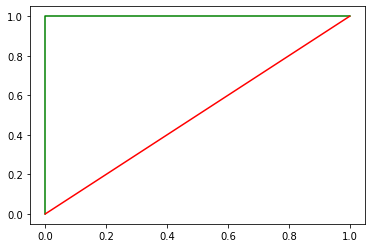

In [22]:
fpr,tpr,thresholds= roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr,'g')
plt.plot(fpr,fpr,'r')
plt.show()

In [23]:
y_test_pred=dtc.predict(x_test)
y_test_prob=dtc.predict_proba(x_test)[:,1]
print(y_test_pred)
print(y_test_prob)
print('train - confusion matrix : ','\n',confusion_matrix(y_test,y_test_pred))
print('train - accuracy score : ','\n', accuracy_score(y_test,y_test_pred))
print('train - AUC : ', roc_auc_score(y_test,y_test_prob))

[0 0 1 ... 0 0 0]
[0. 0. 1. ... 0. 0. 0.]
train - confusion matrix :  
 [[910 167]
 [145  50]]
train - accuracy score :  
 0.7547169811320755
train - AUC :  0.5506749517891579


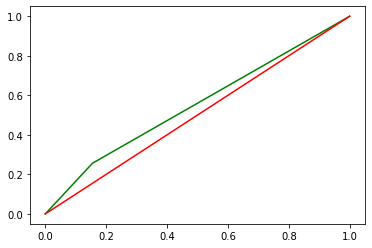

In [24]:
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,'g')
plt.plot(fpr,fpr,'r')
plt.show()

### hyper parameter tuning

In [25]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Random Search

In [42]:
dtc=DecisionTreeClassifier()

from scipy.stats import randint as sp_randint

params_dist={'max_depth':sp_randint(2,10),'min_samples_split':sp_randint(2,100),'min_samples_leaf':sp_randint(1,100),
            'criterion':['gini','entropy']}

r_search=RandomizedSearchCV(dtc,param_distributions=params_dist,scoring='roc_auc',cv=3,n_iter=500, random_state=4 ,n_jobs=-1)

#print(r_search.fit(x,y))
#print(r_search.best_params_)

In [52]:
best_dist={'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 96, 'min_samples_split': 18}

In [45]:
dtc=DecisionTreeClassifier(**best_dist)
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_train)
y_train_prob=dtc.predict_proba(x_train)[:,1]
print('train - confusion matrix : ','\n',confusion_matrix(y_train,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y_train,y_train_pred))
print('train - AUC : ', roc_auc_score(y_train,y_train_prob))

train - confusion matrix :  
 [[2519    0]
 [ 449    0]]
train - accuracy score :  
 0.8487196765498652
train - AUC :  0.7156271578763093


In [46]:
y_test_pred=dtc.predict(x_test)
y_test_prob=dtc.predict_proba(x_test)[:,1]
print('test - confusion matrix : ','\n',confusion_matrix(y_test,y_test_pred))
print('test - accuracy score : ','\n', accuracy_score(y_test,y_test_pred))
print('test - AUC : ', roc_auc_score(y_test,y_test_prob))

test - confusion matrix :  
 [[1077    0]
 [ 195    0]]
test - accuracy score :  
 0.8466981132075472
test - AUC :  0.668859367188058


In [47]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='liblinear')

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


param_dist={'n_estimators':sp_randint(25,250),'max_features':sp_randint(1,7),'max_depth':sp_randint(2,15),
           'min_samples_leaf':sp_randint(1,20),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}

r_search=RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, scoring='roc_auc', n_iter=10,cv=3,n_jobs=-1,random_state=4)

print(r_search.fit(x,y))
#print(r_search.best_params_)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002290A88D5C8>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002290A8418C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002290A88C8C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002290A9A79C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002290A859B48>},
                   random_state=4, scoring='roc_auc')


In [65]:
rf_params={'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 7, 'min_samples_split': 40, 'n_estimators': 81}

# stacking of algorithms

In [66]:
from sklearn.ensemble import VotingClassifier

In [67]:
dtc=DecisionTreeClassifier(**best_dist)
lor=LogisticRegression(solver='liblinear')
rfc=RandomForestClassifier(**rf_params)

In [69]:
clf = VotingClassifier(estimators=[('dtc',dtc),('lor',lor),('rfc',rfc)],voting='soft')

clf.fit(x_train , y_train)

y_train_pred = clf.predict(x_train)
y_train_prob = clf.predict_proba(x_train)[:,1]

print('Train - Confusion Matrix\n',confusion_matrix(y_train,y_train_pred))
print()
print('Train - Accuracy Score',accuracy_score(y_train,y_train_pred))
print()
print('Train - AUC',roc_auc_score(y_train,y_train_prob))

y_test_pred = clf.predict(x_test)
y_test_prob = clf.predict_proba(x_test)[:,1]

print('Test - Confusion Matrix\n',confusion_matrix(y_test,y_test_pred))
print()
print('Test - Accuracy Score',accuracy_score(y_test,y_test_pred))
print()
print('Test - AUC',roc_auc_score(y_test,y_test_prob))

Train - Confusion Matrix
 [[2519    0]
 [ 449    0]]

Train - Accuracy Score 0.8487196765498652

Train - AUC 0.7695191378485647
Test - Confusion Matrix
 [[1077    0]
 [ 194    1]]

Test - Accuracy Score 0.8474842767295597

Test - AUC 0.7055448420350927


In [70]:
clf = VotingClassifier(estimators=[('dtc',dtc),('lor',lor),('rfc',rfc)],voting='soft',weights=[3,1,4])

clf.fit(x_train , y_train)

y_train_pred = clf.predict(x_train)
y_train_prob = clf.predict_proba(x_train)[:,1]

print('Train - Confusion Matrix\n',confusion_matrix(y_train,y_train_pred))
print()
print('Train - Accuracy Score',accuracy_score(y_train,y_train_pred))
print()
print('Train - AUC',roc_auc_score(y_train,y_train_prob))

y_test_pred = clf.predict(x_test)
y_test_prob = clf.predict_proba(x_test)[:,1]

print('Test - Confusion Matrix\n',confusion_matrix(y_test,y_test_pred))
print()
print('Test - Accuracy Score',accuracy_score(y_test,y_test_pred))
print()
print('Test - AUC',roc_auc_score(y_test,y_test_prob))

Train - Confusion Matrix
 [[2519    0]
 [ 449    0]]

Train - Accuracy Score 0.8487196765498652

Train - AUC 0.781687681416336
Test - Confusion Matrix
 [[1077    0]
 [ 195    0]]

Test - Accuracy Score 0.8466981132075472

Test - AUC 0.7014165654834179


In [74]:
clf = VotingClassifier(estimators=[('dtc',dtc),('lor',lor),('rfc',rfc)],voting='hard')

clf.fit(x_train , y_train)

y_train_pred = clf.predict(x_train)

print('Train - Confusion Matrix\n',confusion_matrix(y_train,y_train_pred))
print()
print('Train - Accuracy Score',accuracy_score(y_train,y_train_pred))
print()

y_test_pred = clf.predict(x_test)


print('Test - Confusion Matrix\n',confusion_matrix(y_test,y_test_pred))
print()
print('Test - Accuracy Score',accuracy_score(y_test,y_test_pred))
print()

Train - Confusion Matrix
 [[2519    0]
 [ 448    1]]

Train - Accuracy Score 0.8490566037735849

Test - Confusion Matrix
 [[1077    0]
 [ 195    0]]

Test - Accuracy Score 0.8466981132075472

